In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

from tensorflow.keras.activations import linear, relu, sigmoid

In [10]:
def load_data():
    X=np.load("data/X.npy")
    Y=np.load("data/y.npy")
    return X,Y

In [30]:
x,y=load_data()

In [31]:
print("Shape of x :",x.shape)

print("Shape of Y is :",y.shape)

Shape of x : (5000, 400)
Shape of Y is : (5000, 1)


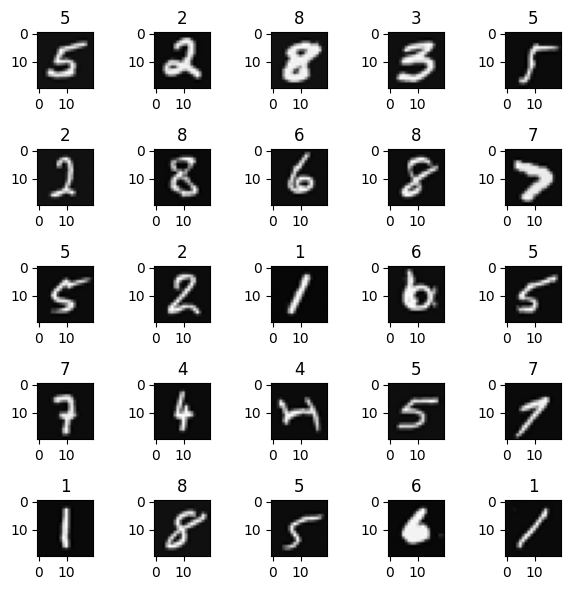

In [32]:
idx = np.random.randint(0, x.shape[0], 25)
plt.figure(figsize=(6,6))

for i, index in enumerate(idx):
   
    img = x[index].reshape(20, 20).T
    label = y[index, 0]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(str(label))
   

plt.tight_layout()
plt.show()

In [33]:
X = x / 255.0
y = y.ravel() 

In [34]:
y.shape

(5000,)

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (3000, 400) (3000,)
Val: (1000, 400) (1000,)
Test: (1000, 400) (1000,)


In [37]:
def build_model_1():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(400,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)  
    ])
    return model

def build_model_2():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(400,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model


def build_model_3():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((20, 20, 1), input_shape=(400,)),  # reshape flat -> 20x20
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model

def build_model_4():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(400,)),
        Dense(25,activation='relu',name='layer1'),
        Dense(15,activation='relu',name='layer2'),
        Dense(10,activation='linear',name='layer3')
    ])
    return model


In [38]:
models = {
    "MLP_128": build_model_1(),
    "MLP_256_Dropout": build_model_2(),
    "CNN": build_model_3(),
    "my4th":build_model_4()
}

histories = {}
val_losses = {}

for name, model in models.items():
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    print(f"\nTraining {name} ...")
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0
    )
    
    histories[name] = history
    val_losses[name] = min(history.history['val_loss'])
    print(f"{name} -> Best Val Loss: {val_losses[name]:.4f}")


c:\Users\HP\Desktop\supervisedmachine learning\ml\.venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training MLP_128 ...
MLP_128 -> Best Val Loss: 0.7639

Training MLP_256_Dropout ...
MLP_256_Dropout -> Best Val Loss: 0.4136

Training CNN ...
CNN -> Best Val Loss: 0.3338

Training my4th ...
my4th -> Best Val Loss: 0.8786


In [40]:
best_model_name = min(val_losses, key=val_losses.get)
best_model = models[best_model_name]

print(f"\n Best model: {best_model_name}")



 Best model: CNN


In [41]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc*100:.2f}%")


Test Loss: 0.3795, Test Accuracy: 88.50%


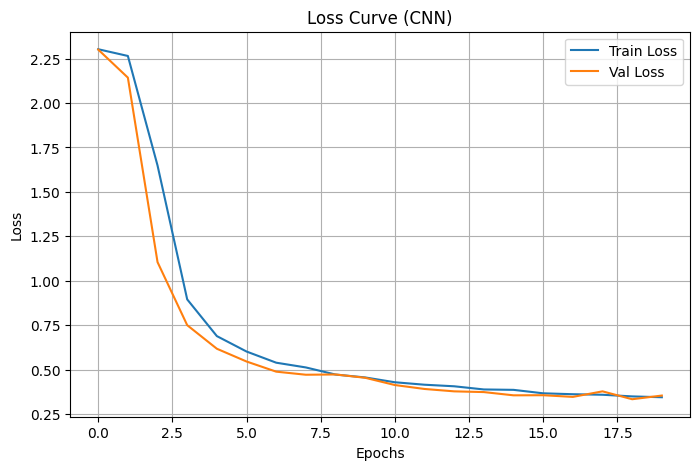

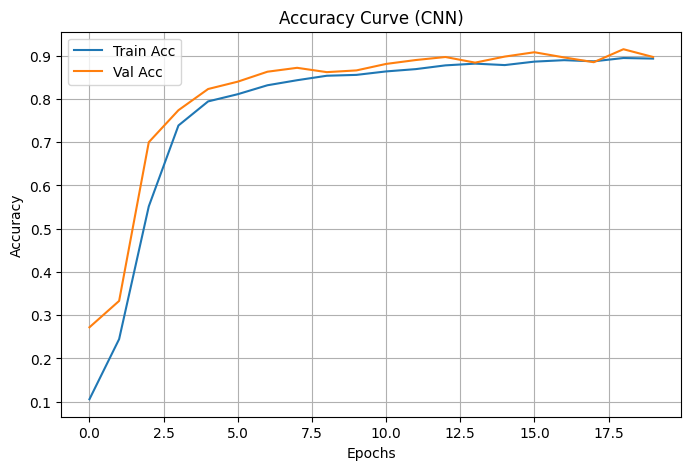

In [42]:
history = histories[best_model_name]

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss Curve ({best_model_name})')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Curve ({best_model_name})')
plt.legend()
plt.grid(True)
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


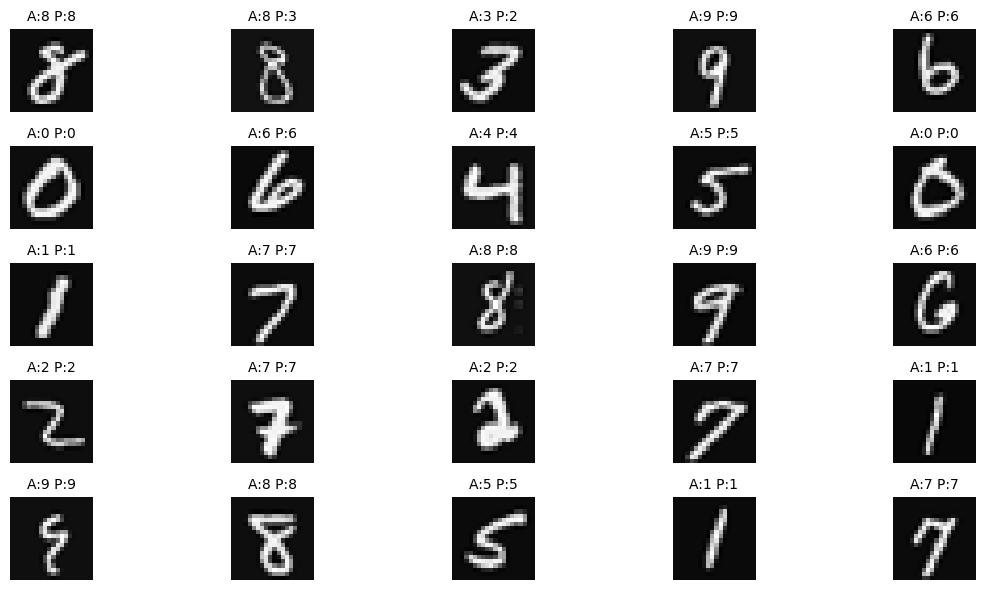

In [47]:
import random

logits = best_model.predict(X_test)
y_pred = np.argmax(logits, axis=1)

idx = random.sample(range(len(X_test)), 25)
plt.figure(figsize=(12,6))

for i, index in enumerate(idx):
    img = X_test[index].reshape(20, 20).T
    actual, pred = y_test[index], y_pred[index]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"A:{actual} P:{pred}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()



=== MLP_128 ===


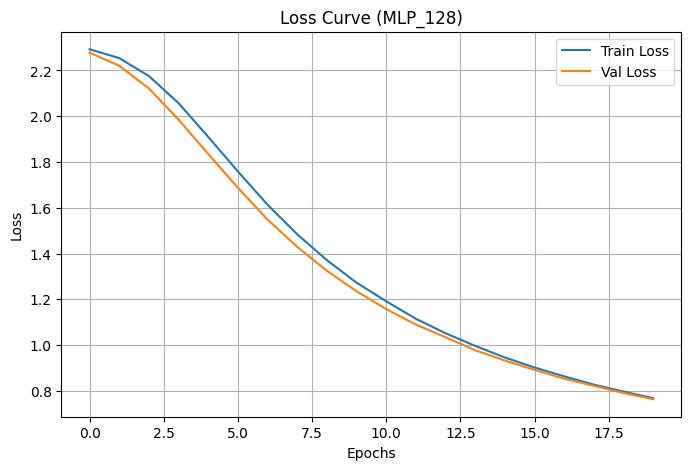

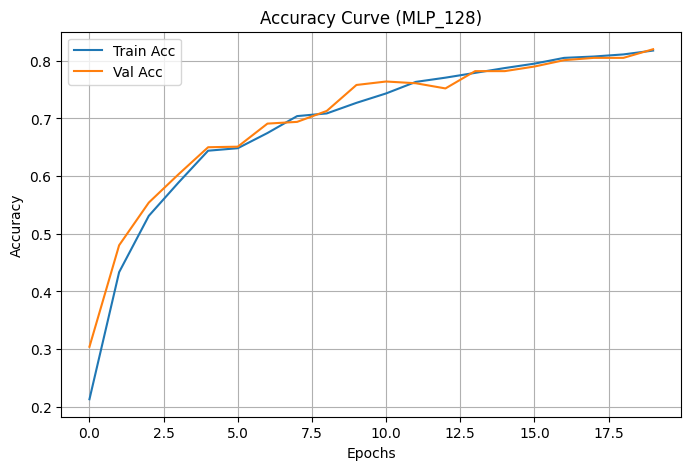

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


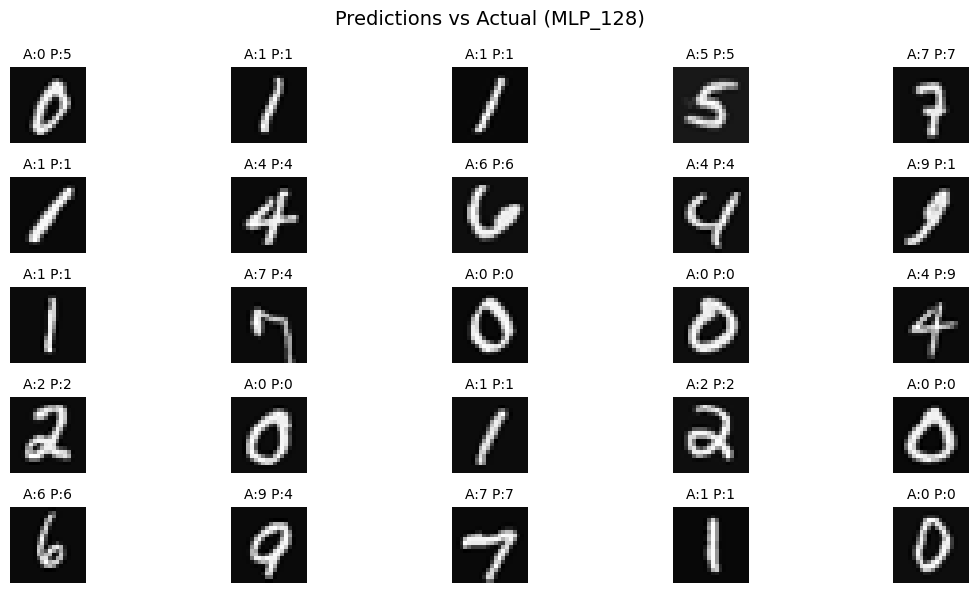


=== MLP_256_Dropout ===


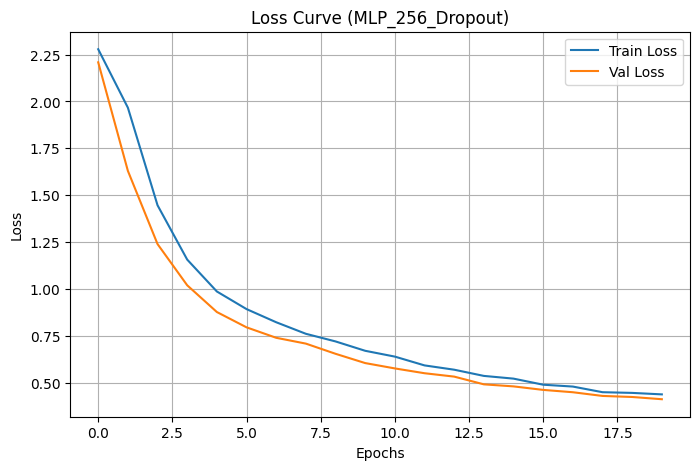

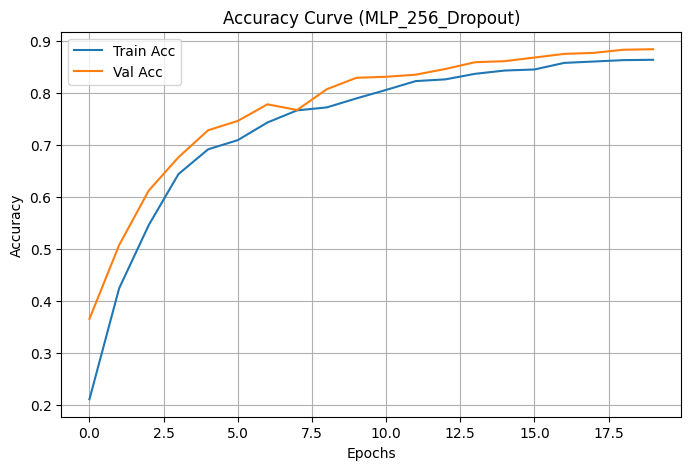

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


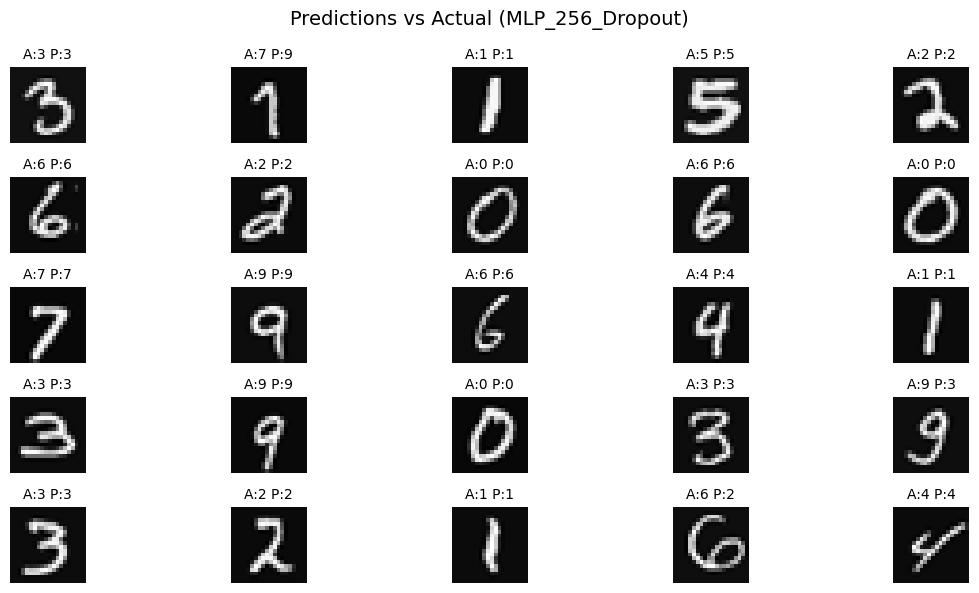


=== CNN ===


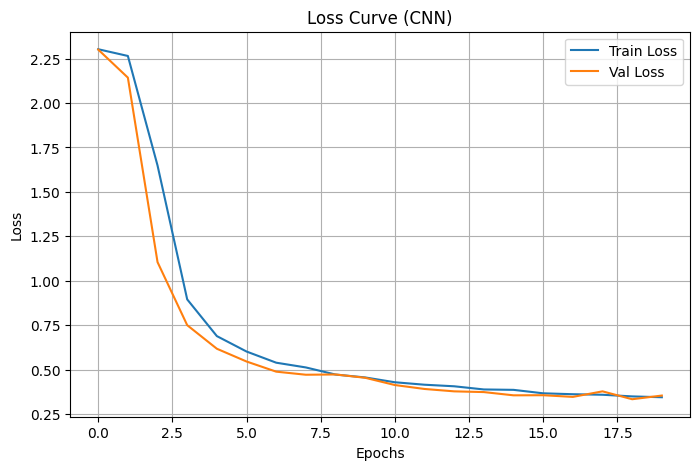

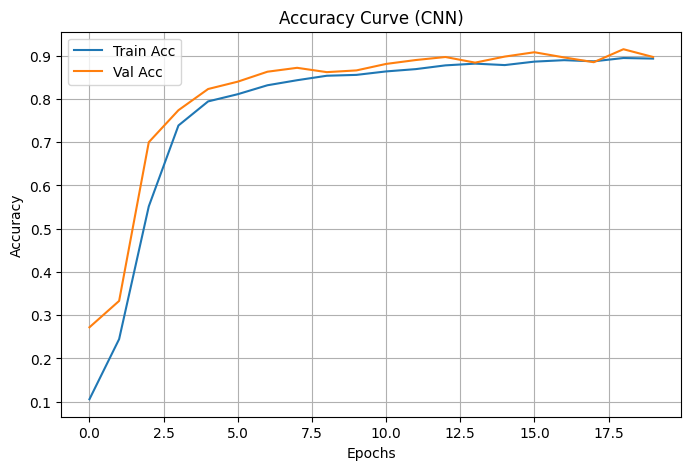

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


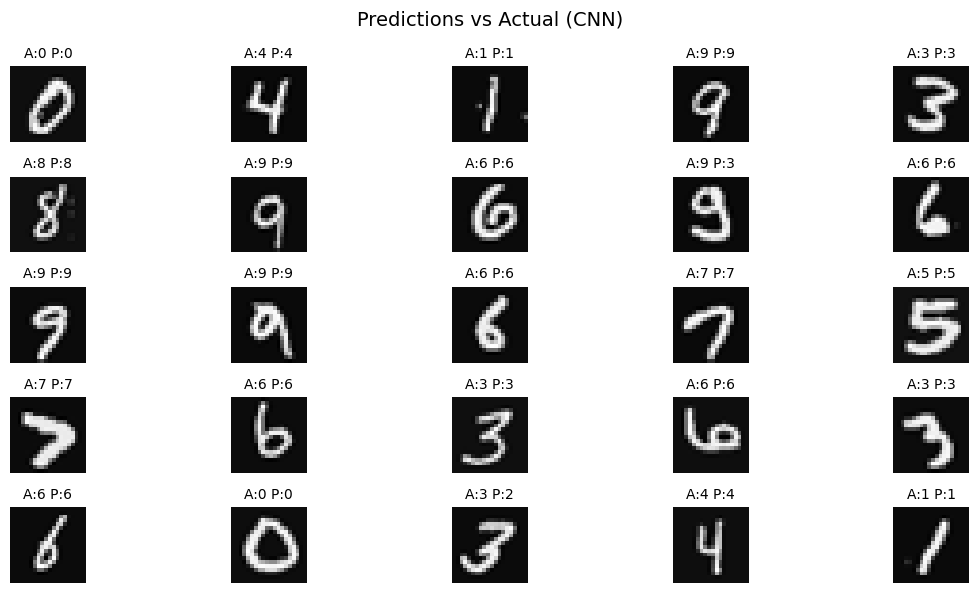


=== my4th ===


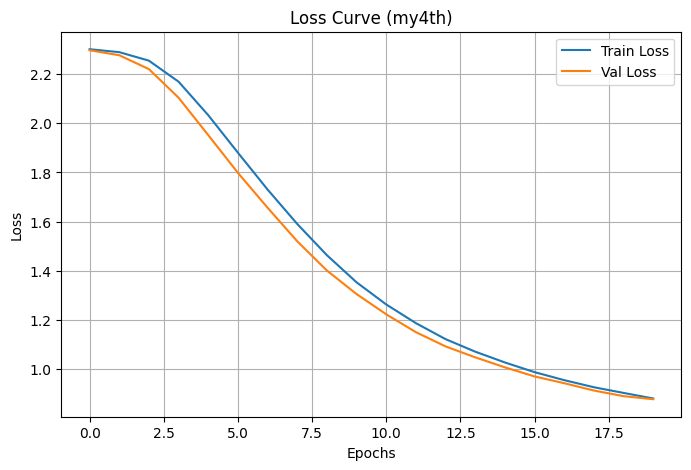

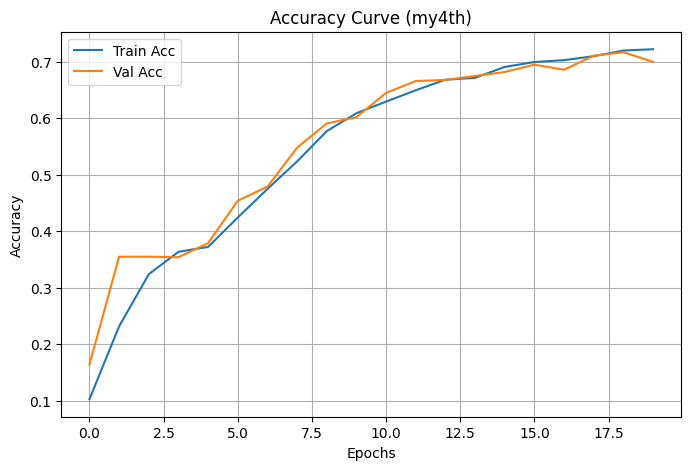

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


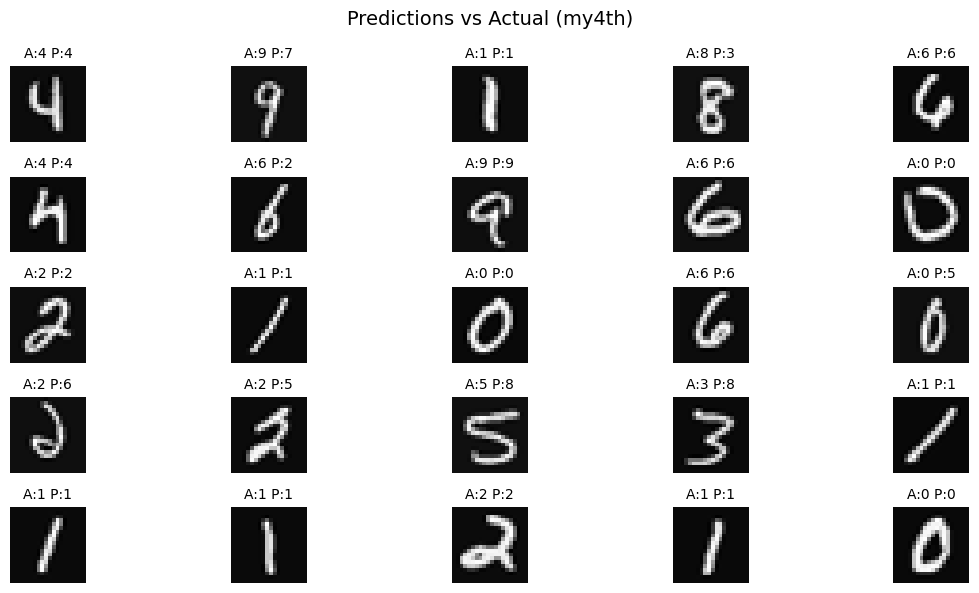

In [49]:
for model_name, model in models.items():   # assuming you have models dict
    print(f"\n=== {model_name} ===")
    history = histories[model_name]

    # ---- Plot Loss ----
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---- Plot Accuracy ----
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---- Predictions vs Actual ----
    logits = model.predict(X_test)
    y_pred = np.argmax(logits, axis=1)

    idx = random.sample(range(len(X_test)), 25)
    plt.figure(figsize=(12,6))

    for i, index in enumerate(idx):
        img = X_test[index].reshape(20, 20).T
        actual, pred = y_test[index], y_pred[index]

        plt.subplot(5, 5, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"A:{actual} P:{pred}", fontsize=10)
        plt.axis("off")

    plt.suptitle(f"Predictions vs Actual ({model_name})", fontsize=14)
    plt.tight_layout()
    plt.show()